<a href="https://colab.research.google.com/github/linetmshaji/salary-satisfaction-prediction-using-Machine-Learning/blob/main/salary_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# reading csv file using pandas 
dataset = pd.read_csv("salary.csv",encoding = "ISO-8859-1")
# returns first 5 rows
#dataset.head()

In [7]:
# To print no of unique values in each columns of a dataset in ascending order
unique_value = dataset.nunique(axis=0) 
table= pd.DataFrame()
table['Value']= unique_value            
table=table.sort_values('Value',ascending=False)
table

,Value
id,2946
orignal_website_directory,2946
url,2946
your_favoritearticle_today,2945
last_pymnt_amnt,2678
...,...
next_pymnt_d,2
Target_Satisfied,2
term,2
Process Date,1


In [8]:
# it will print out number of rows and columns in the given dataset
dataset.shape

(2946, 83)

In [9]:
# It will drop the column pymnt_plan
dataset.drop('pymnt_plan',
  axis='columns', inplace=True)

In [10]:
#It will drop all the columns which has NAN values
dataset = dataset.dropna(axis='columns')
dataset.shape

(2946, 26)

In [11]:
# check missing values in variables
dataset.isnull().sum()


id                           0
Target_Salary                0
Target_Satisfied             0
LOAN_AMT                     0
Business Title               0
Civil Service Title          0
Division/Work Unit           0
Job Description              0
CompanySize                  0
term                         0
loan_status                  0
orignal_website_directory    0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
earliest_cr_line             0
last_pymnt_d                 0
last_pymnt_amnt              0
last_credit_pull_d           0
Time                         0
url                          0
dateAdded                    0
previousaddress              0
phones                       0
CrimeTime                    0
dtype: int64

In [13]:
# It will discribe the dataset
# dataset.describe()

In [14]:
# View summary of dataset
# dataset.info()

In [15]:
#lets do Lable enconding coding to make more features 
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in dataset:
    if dataset[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(dataset[col].unique())) <= 2:
            # Train on the training data
            le.fit(dataset[col])
            # Transform both training and testing data
            dataset[col] = le.transform(dataset[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


1 columns were label encoded.


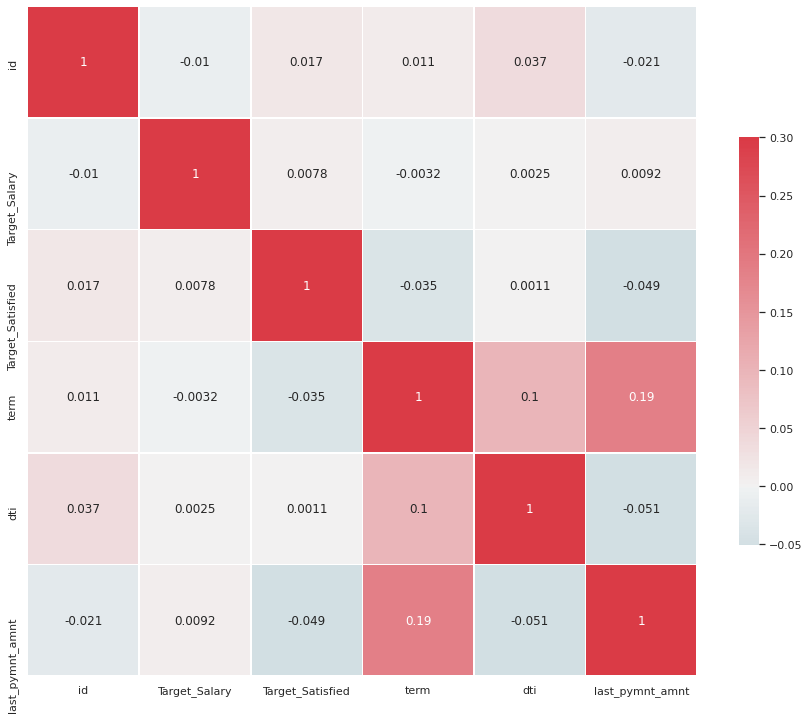

In [16]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(dataset.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
dataset = pd.get_dummies(dataset)
dataset.head()


,id,Target_Salary,Target_Satisfied,term,dti,last_pymnt_amnt,"LOAN_AMT_$1,000.00","LOAN_AMT_$1,050.00","LOAN_AMT_$1,200.00","LOAN_AMT_$1,400.00","LOAN_AMT_$1,450.00","LOAN_AMT_$1,500.00","LOAN_AMT_$1,600.00","LOAN_AMT_$1,800.00","LOAN_AMT_$1,975.00","LOAN_AMT_$10,000.00","LOAN_AMT_$10,050.00","LOAN_AMT_$10,075.00","LOAN_AMT_$10,100.00","LOAN_AMT_$10,125.00","LOAN_AMT_$10,150.00","LOAN_AMT_$10,175.00","LOAN_AMT_$10,200.00","LOAN_AMT_$10,250.00","LOAN_AMT_$10,375.00","LOAN_AMT_$10,400.00","LOAN_AMT_$10,500.00","LOAN_AMT_$10,525.00","LOAN_AMT_$10,550.00","LOAN_AMT_$10,650.00","LOAN_AMT_$10,700.00","LOAN_AMT_$10,725.00","LOAN_AMT_$10,800.00","LOAN_AMT_$10,825.00","LOAN_AMT_$10,850.00","LOAN_AMT_$10,900.00","LOAN_AMT_$10,925.00","LOAN_AMT_$11,000.00","LOAN_AMT_$11,050.00","LOAN_AMT_$11,075.00",...,CrimeTime_8:32:00,CrimeTime_8:34:00,CrimeTime_8:40:00,CrimeTime_8:41:00,CrimeTime_8:42:00,CrimeTime_8:45:00,CrimeTime_8:48:00,CrimeTime_8:50:00,CrimeTime_8:52:00,CrimeTime_8:55:00,CrimeTime_8:57:00,CrimeTime_9:00:00,CrimeTime_9:01:00,CrimeTime_9:03:00,CrimeTime_9:04:00,CrimeTime_9:05:00,CrimeTime_9:06:00,CrimeTime_9:07:00,CrimeTime_9:09:00,CrimeTime_9:10:00,CrimeTime_9:15:00,CrimeTime_9:18:00,CrimeTime_9:20:00,CrimeTime_9:23:00,CrimeTime_9:25:00,CrimeTime_9:28:00,CrimeTime_9:30:00,CrimeTime_9:31:00,CrimeTime_9:34:00,CrimeTime_9:35:00,CrimeTime_9:39:00,CrimeTime_9:40:00,CrimeTime_9:42:00,CrimeTime_9:43:18,CrimeTime_9:45:00,CrimeTime_9:46:00,CrimeTime_9:47:00,CrimeTime_9:50:00,CrimeTime_9:55:00,CrimeTime_9:58:00
0,68407277,42405.00,0,0,5.91,122.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,68355089,60740.00,1,0,16.06,926.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,68341763,51907.68,0,1,10.78,15813.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,66310712,51907.68,0,1,17.06,829.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,68476807,35.00,1,1,25.37,10128.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
corr= dataset.corr()
y=np.array(dataset['Target_Satisfied'])
X= np.array(dataset.drop('Target_Satisfied',axis=1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape


In [ ]:
X_train.dtypes

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=100,random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))